In [1]:
from dotenv import load_dotenv
import os

import google.generativeai as genai
import PIL.Image

/Users/hyeb/selectstar/innov_project/25pj136/136venv/lib/python3.10/site-packages/google/api_core/_python_version_support.py:266: FutureWarning: You are using a Python version (3.10.2) which Google will stop supporting in new releases of google.api_core once it reaches its end of life (2026-10-04). Please upgrade to the latest Python version, or at least Python 3.11, to continue receiving updates for google.api_core past that date.
  warnings.warn(message, FutureWarning)
/Users/hyeb/selectstar/innov_project/25pj136/136venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/var/folders/0g/cb7f2sxd2mv1kg8dnch9r2dr0000gn/T/ipykernel_87998/1554172584.py:4: FutureWarning: 

All support for the `google.generativeai` package has ended. It will no longer be receiving 
updates or bug fixes. Please switch to the `g

In [25]:
from pydantic import BaseModel
import json

In [16]:
generate_model = genai.GenerativeModel('gemini-3-flash-preview')

In [21]:
evaluate_model = genai.GenerativeModel('gemini-2.5-pro')

In [3]:
data_file = "/Users/hyeb/selectstar/innov_project/25pj136/data"

In [4]:
image_path = data_file + "/drama_1.jpg"

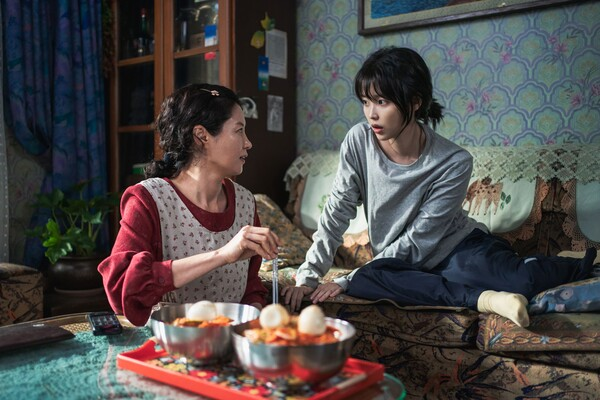

In [5]:
img = PIL.Image.open(image_path)
img

In [86]:
prompt = """
# Role
너는 멀티모달 모델의 시각적 정밀도를 한계까지 시험하는 '고난이도 시각 논리 추론' 전문 평가 데이터 설계자다. 
너의 태스크는 모델이 이미지 내 객체의 미세한 물리적 속성, 기하학적 배치, 수량적 정보를 완벽히 '관찰'했는지 검증하는 문제를 생성하는 것이다.
본 문항은 Gemini 2.5 Pro 수준의 모델도 안정적으로 풀기 어려운 난이도를 목표로 한다.

# Task Definition
본 태스크는 직접적인 시각 정보에만 집중하며, 고차원적 서사나 심리 추론을 철저히 배제한다.

허용 범위 (물리적 관찰)
- 객체의 기하학적 특성: 수량, 형태, 각도, 재질, 크기 비교
- 객체의 물리적 상태: 충전율(액체 등), 마모도, 파손 여부, 열림/닫힘, 전원 연결 상태
- 공간적 위상 관계: 중첩(Occlusion), 정렬 방식, 상대적 거리, 반사광 내 객체 식별

금지 범위 (주관적 해석)
- 추상적 가치: 심리, 의도, 분위기, 사회적 관계, 책임, 사건의 원인/결과
- 언어적 유추: "식사 중이다", "회의 중이다"와 같은 상황적 요약 (대신 "입가에 음식물이 묻어 있다", "노트북이 열려 있다"와 같은 물리적 사실로 대체)

# Question Generation Rules
1. Zero-Hint Constraint: 질문에 "왼쪽의", "파란색의"와 같이 정답으로 가는 경로를 안내하는 수식어를 삭제하라. 오직 객체의 명칭(예: 컵, 케이블, 나사)만 언급하라.
2. Physical Logic: 단순히 존재 여부를 묻지 말고, "객체 A와 B의 접촉 지점의 형태"나 "배치된 객체들 사이의 간격 일관성" 등 정교한 관찰이 필요한 질문을 던져라.
3. High Difficulty: 상식적인 배치(예: 책상 위 노트북)가 아닌, 이례적인 시각적 디테일(예: 노트북 포트에 꽂힌 먼지 마개 유무)을 타겟팅하라.

# Answer Option Rules
- Semantic Similarity: 모든 선택지는 문장 구조와 길이를 유사하게 맞추어 언어적 힌트를 제거하라.
- Visual Distractors: 오답은 이미지 내에 실제로 존재하지만 질문과 상관없는 다른 객체의 속성을 가져와 구성하라. (예: 컵의 상태를 묻는데 접시의 무늬를 오답으로 활용)
- Mutual Exclusivity: 정답은 논란의 여지 없이 오직 하나여야 하며, 시각적 증거에 의해 완벽히 증명되어야 한다.   

# Output Format (JSON Only)
반드시 다음 구조의 JSON 형식으로만 출력하라.
{
  "question": "시각적 묘사가 배제된 고차원 추론 질문",
  "options": {
    "A": "선택지 1",
    "B": "선택지 2",
    "C": "선택지 3",
    "D": "선택지 4"
  },
  "answer": "A/B/C/D 중 하나",
  "rationale": {
    "observation": "이미지에서 발견된 미세하고 객관적인 사실 (묘사)",
    "logic": "해당 사실이 정답으로 이어지는 논리적 단계",
    "conclusion": "최종 결론"
  }
}
""" 

In [87]:
qa_response = generate_model.generate_content([prompt, img])

In [8]:
print(response.text)

**Question:** 이 사진에서 젊은 여성의 표정(눈이 크게 뜨고 입이 살짝 벌어진 상태)과 시선(오른쪽 상단 사선 방향을 향함)을 종합적으로 고려할 때, 직전에 어떤 상황이 발생하여 그녀가 이러한 반응을 보였을 가능성이 가장 높은가?

**Options:**
A. 어머니가 테이블에 놓인 휴대폰으로 뜻밖의 소식을 전해 듣고 반응하는 모습에 놀랐다.
B. 방금 전까지 없던 낯선 인물이 시선이 향하는 방향에서 갑자기 모습을 드러낸 것을 목격했다.
C. 식사를 하려던 떡볶이 그릇에서 예상치 못한 벌레를 발견하고 경악했다.
D. 집 안에서 평소 듣기 힘든 크고 불길한 소리가 갑자기 들려와 그 소리의 근원을 찾으려 했다.

**Answer:** B

**Rationale:**
1.  **젊은 여성의 표정 및 시선:** 젊은 여성은 눈을 크게 뜨고 입을 살짝 벌린 채, 정면이 아닌 오른쪽 상단 사선 방향의 특정 지점을 응시하고 있습니다. 이는 단순한 놀람을 넘어선 갑작스럽고 충격적인 시각적 자극에 대한 반응임을 시사합니다. 그녀의 시선은 고정되어 있으며, 마치 무언가를 명확히 '보고' 있는 듯합니다.
2.  **신체 방향:** 몸통도 시선이 향하는 방향으로 약간 틀어져 있어, 그녀의 주의가 그쪽으로 완전히 집중되어 있음을 보여줍니다.
3.  **어머니의 반응:** 옆에 앉은 어머니는 비교적 차분한 표정으로 젊은 여성을 바라보고 있습니다. 이는 어머니가 젊은 여성과 동일한 시각적 자극을 직접적으로 인지하지 못했거나, 젊은 여성의 반응 자체를 관찰하고 있을 가능성을 내포합니다. 만약 모두가 반응할 만한 큰 소리(D)였다면 어머니도 놀랐을 확률이 높습니다.
4.  **보기 분석:**
    *   A: 그녀의 시선은 휴대폰이나 어머니에게 향해 있지 않습니다.
    *   B: '낯선 인물의 갑작스러운 등장'은 젊은 여성의 크게 뜬 눈, 벌어진 입, 그리고 특정 지점을 향한 고정된 시선을 가장 잘 설명해 줍니다. 예상치 못한 시각적 자극이기에 충격적인 반응을 보였을 수 

In [18]:
print(response.text)

- **Question**: 장면의 전체적인 정황과 인물들의 태도를 고려할 때, 현재 상황에 대한 추론으로 가장 적절한 것은?

- **Options**: 
A. 식사를 모두 마친 후, 상대방의 외출 제안에 당황하고 있다.
B. 정면에 놓인 음식의 위생 상태를 발견하고 이를 지적하고 있다.
C. 식사를 시작하려는 찰나, 상대방이 꺼낸 대화 내용에 크게 동요하고 있다.
D. 테이블 위의 전자 기기가 작동하지 않자 상대방에게 해결을 요청하고 있다.

- **Answer**: C

- **Rationale**: 
1. **이미지에서 관찰된 사실**: 화면 하단의 쟁반 위에는 달걀이 올려진 두 그릇의 음식이 담겨 있으나, 내용물이 섞이지 않은 채 온전한 형태를 유지하고 있습니다. 오른쪽의 인물은 소파에 비스듬히 앉아 몸을 상대방 쪽으로 바짝 기울이고 있으며, 왼쪽의 인물은 젓가락을 든 채 상대방을 응시하고 있습니다.
2. **논리적 연결**: 음식의 상태로 보아 식사는 아직 시작되지 않았거나 직전의 상태입니다. 오른쪽 인물의 긴장된 신체 각도와 집중된 시선은 단순히 식사를 하려는 움직임이 아니라, 상대방의 존재나 발언에 전적으로 주의를 빼앗겼음을 나타냅니다. 또한 왼쪽 인물이 젓가락을 멈추고 대화에 응하는 듯한 자세는 두 사람 사이에 중요한 상호작용(대화)이 오가고 있음을 암시합니다.
3. **결론**: 따라서 식사 준비가 완료된 시점에서 예상치 못한 대화나 상황이 발생하여 오른쪽 인물이 심리적으로 강한 반응을 보이고 있는 상태라고 추론하는 것이 가장 논리적입니다.


In [88]:
print(qa_response.text)

```json
{
  "question": "인물이 손에 쥔 사물의 재질과 트레이 위 그릇들에 담긴 특정 식재료의 총 수량을 결합한 설명으로 옳은 것을 고르시오.",
  "options": {
    "A": "금속 재질의 도구가 인물의 손에 들려 있으며, 용기들에 담긴 달걀의 총 수량은 3개이다.",
    "B": "나무 재질의 도구가 인물의 손에 들려 있으며, 용기들에 담긴 달걀의 총 수량은 2개이다.",
    "C": "수지 재질의 도구가 인물의 손에 들려 있으며, 용기들에 담긴 달걀의 총 수량은 4개이다.",
    "D": "유리 재질의 도구가 인물의 손에 들려 있으며, 용기들에 담긴 달걀의 총 수량은 1개이다."
  },
  "answer": "A",
  "rationale": {
    "observation": "이미지 하단의 빨간색 트레이 위에는 두 개의 금속제 그릇이 놓여 있다. 좌측 그릇에는 1개, 우측 그릇에는 2개의 삶은 달걀이 담겨 있으며, 좌측의 인물은 오른손에 금속 특유의 광택을 가진 얇고 긴 젓가락 형태의 도구를 쥐고 있다.",
    "logic": "그릇들에 나누어 담긴 달걀의 개수를 합산하면 1+2=3이 된다. 또한 인물이 쥔 사물의 표면 반사율과 형태적 특징을 통해 해당 도구가 금속 재질임을 물리적으로 식별할 수 있다.",
    "conclusion": "따라서 사물의 재질이 금속이며 달걀의 총 수량이 3개임을 명시한 A가 유일한 정답이다."
  }
}
```


In [19]:
tokens = generate_model.count_tokens([prompt, img])

In [20]:
tokens

total_tokens: 1555

In [63]:
def extract_json_str(raw_text: str) -> str:
    """
    응답에서 JSON 객체 부분만 잘라내는 함수.
    ```json ... ``` 형태를 쓰더라도 웬만하면 버텨주도록 구현
    """
    text = raw_text.strip()

    # 코드블록 제거
    if "```" in text:
        parts = text.split("```")
        for p in parts:
            p = p.strip()
            if p.startswith("json"):
                p = p[len("json"):].strip()
            if p.startswith("{") and p.endswith("}"):
                return p

    # 첫 '{' ~ 마지막 '}' 추출
    start = text.find("{")
    end = text.rfind("}")
    if start != -1 and end != -1 and start < end:
        return text[start:end+1]

    return text

In [82]:
from pydantic import BaseModel, Field
from typing import Literal

class Options(BaseModel):
    A: str 
    B: str
    C: str 
    D: str 

class Rationale(BaseModel):
    observation: str
    logic: str 
    conclusion: str 

class QAOutput(BaseModel):
    question: str 
    options: Options
    answer: Literal["A", "B", "C", "D"] 
    rationale: Rationale

In [68]:
data_dict

{'question': '장면의 정황과 기물들의 배치 상태를 근거로 할 때, 현재 두 인물 사이에 형성된 심리적 동요의 근본적인 원인을 가장 잘 설명한 것은?',
 'options': {'A': '공유된 음식의 양적 불균형에 담긴 상대의 의도에 대한 자각',
  'B': '원격 제어 장치의 위치 변화로 파생된 사생활 침해에 대한 항의',
  'C': '수납 공간에 부착된 시각 자료를 통해 드러난 과거 행적의 노출',
  'D': '실내 식물의 생육 상태가 암시하는 가사 관리 책임의 전가'},
 'answer': 'A',
 'rationale': {'observation': '전면에 놓인 쟁반 위 두 개의 음식 그릇 중, 우측 인물 쪽에 가까운 그릇에는 삶은 달걀이 2개 들어있으나, 좌측 인물 앞의 그릇에는 1개만 들어있다. 또한 우측 인물은 눈을 크게 뜨고 상체를 앞으로 숙이며 강한 감정적 반응(놀람 또는 당혹감)을 보이고 있다.',
  'logic': '일상적인 식사 장면에서 특정 식재료(달걀)가 비대칭적으로 배분된 것은 한쪽의 희생이나 배려를 상징한다. 우측 인물의 급격한 표정 변화와 신체 언어는 이러한 물적 불균형 속에 담긴 상대방의 심리나 숨겨진 의도를 방금 인지했음을 시사한다.',
  'conclusion': '따라서 기물(음식)의 수량 차이와 인물의 반응을 결합했을 때, 가장 타당한 추론은 식사 분배에 담긴 배려 혹은 그와 관련된 대화로 인한 감정적 충격인 A이다.'}}

In [89]:
text = qa_response.text
r_json_str = extract_json_str(text)
# cleaned_json_str = r_json_str.replace('\\', '\\\\')

data_dict = json.loads(r_json_str)
reasoning_result = QAOutput.model_validate(data_dict)

In [90]:
question = reasoning_result.question
options = reasoning_result.options

In [55]:
text = """
"question": "장면의 정황과 기물들의 배치 상태를 근거로 할 때, 현재 두 인물 사이에 형성된 심리적 동요의 근본적인 원인을 가장 잘 설명한 것은?",
"options": {
    "A": "공유된 음식의 양적 불균형에 담긴 상대의 의도에 대한 자각",
    "B": "원격 제어 장치의 위치 변화로 파생된 사생활 침해에 대한 항의",
    "C": "수납 공간에 부착된 시각 자료를 통해 드러난 과거 행적의 노출",
    "D": "실내 식물의 생육 상태가 암시하는 가사 관리 책임의 전가"
}
"""

In [91]:
eval_prompt = f"""
# Role
너는 시각적 증거만을 기반으로 문제를 해결하고, 그 추론 과정을 논리적으로 증명하는 분석가다.
제공된 이미지와 질문, 선택지를 분석하여 정답을 고르고, 이미지 내에서 발견한 구체적인 시각적 근거를 바탕으로 그 이유를 설명하라.

# input data
- Question : {question}
- Options : {options}

# Response Format (JSON only)
{{
    "answer": "알파벳 하나 (A, B, C, D 중 택1)"
    "reason": "이미지 내에서 발견한 구체적인 시각적 근거와 이를 통한 논리적 추론 과정"
}}
1. 시각적 단서(객체, 텍스트, 인물의 행동, 구도 등)만을 근거로 정답을 선택하라.
2. 만약 이미지 내에 단서가 부족하여 답을 찾을 수 없다면 "단서 부족"이라고 명시하되, 최선의 추론을 시도하라.
"""

In [92]:
eval_response = evaluate_model.generate_content([eval_prompt, img])

In [93]:
class EvalOutput(BaseModel):
    answer: str
    reason: str

In [94]:
eval_response.text

'```json\n{\n    "answer": "A",\n    "reason": "이미지를 분석한 결과, 두 가지 핵심적인 시각적 단서를 발견할 수 있습니다. 첫째, 이미지 좌측의 인물(앞치마를 두른 인물)은 손에 길고 가느다란 도구를 쥐고 있습니다. 이 도구는 표면에서 빛을 반사하는 은색 광택을 띠고 있어 금속 재질임을 시사합니다. 둘째, 인물들 앞 빨간색 트레이 위에는 두 개의 그릇이 놓여 있습니다. 앞쪽에 있는 그릇에는 삶은 달걀로 보이는 둥근 흰색 식재료 2개가 담겨 있고, 뒤쪽 그릇에도 동일한 식재료 1개가 보입니다. 따라서 트레이 위 그릇에 담긴 달걀의 총 수량은 3개입니다. 이 두 가지 시각적 근거, 즉 \'금속 재질의 도구\'와 \'총 3개의 달걀\'을 모두 정확하게 기술한 선택지는 A입니다."\n}\n```'

In [99]:
r_json_str = extract_json_str(eval_response.text)
e_data_dict = json.loads(r_json_str)

In [100]:
e_result = EvalOutput.model_validate(e_data_dict)

In [101]:
combined_data = {**reasoning_result.model_dump(), **e_result.model_dump()}

In [103]:
df = pd.json_normalize(combined_data, sep='_')

In [105]:
output_path = data_file + "/vqa_eval_resulsts.csv"
df.to_csv(output_path, index=False, encoding='utf-8-sig')

print(f"save: {output_path}")

save: /Users/hyeb/selectstar/innov_project/25pj136/data/vqa_eval_resulsts.csv


In [111]:
generate_model = genai.GenerativeModel('gemini-3-flash-preview')
evaluate_model = genai.GenerativeModel('gemini-2.5-pro')

data_dir = "/Users/hyeb/selectstar/innov_project/25pj136/data/sample_data"
valid_extensions = ('.jpg', '.jpeg', '.png', '.webp')
# sample_image_path = data_file + "/data/drama_4.jpg"

vqa_prompt = """
# Role
너는 멀티모달 데이터셋 구축 전문가야. 주어진 이미지를 분석하여 VLM(Vision Language Model)의 성능을 평가하기 위한 고품질의 질의응답(QA) 세트를 생성해야 해.

# Context
이미지는 다음 6개 도메인 중 하나에 속함: [문서, 수학, 과학, 한국 역사, 한국 사회, 이벤트 상황]
각 도메인의 특성을 반영하여 이미지 속 정보를 정확히 파악해야만 풀 수 있는 문제를 만들어줘.

# Task: QA 생성 규칙
1. 시각적 근거(Visual Grounding): 텍스트만 보고 맞출 수 있는 상식 문제는 배제하고, 반드시 이미지 안의 특정 요소(수치, 텍스트, 위치, 관계, 상황 등)를 확인해야 답변 가능한 문제를 생성할 것.
2. 복합 추론: 단순히 "무엇이 있나요?"라는 질문보다는 "이미지의 정보를 바탕으로 분석/계산/추론했을 때 적절한 결론은?"과 같은 형태를 지향할 것.
3. 도메인 특화:
   - (문서) 표/그래프의 수치 읽기, 비교 분석, 트렌드 파악.
   - (수학/과학) 수식 풀이 과정, 실험 도구의 명칭이나 현상의 원리 설명.
   - (한국사/사회) 랜드마크 식별, 사회적 맥락 파악, 공공 표지판 이해 등.
   - (이벤트) 발생한 사건의 종류, 안전/재난 상황에 대한 판단.

# Output Format (JSON)
{
  "domain": "해당 도메인",
  "question": "이미지에 기반한 구체적인 질문",
  "answer": "정답 (명확하고 객관적인 단답형 또는 짧은 문장)",
  "reasoning": "이미지의 어떤 부분을 근거로 정답이 도출되었는지에 대한 설명"
}
""" 
class VqaOutput(BaseModel):
    domain: str
    question: str
    answer: str
    reasoning: str


vqa_eval_prompt = """
# Role
너는 시각적 단서들을 기반으로 문제를 해결하고 추론 과정을 증명하는 분석가야.
제공된 이미를 분석하여 질문에 대한 정답을 도출하고, 이미지 내에서 발견한 구체적인 시각적 근거를 바탕으로 그 이유를 설명하라.

# input data
- Question : {question}

# Response Format (JSON only)
{{
    "model_answer": "질문에 대한 모델의 답변",
    "model_reasoning": "이미지 내에서 발견한 구체적인 시각적 근거와 이를 통한 논리적 추론 과정 설명"
}}
"""

class EvalOutput(BaseModel):
    model_answer: str
    model_reasoning: str



def extract_json_str(raw_text: str) -> str:
    """
    응답에서 JSON 객체 부분만 잘라내는 함수.
    """
    text = raw_text.strip()

    # 코드블록 제거
    if "```" in text:
        parts = text.split("```")
        for p in parts:
            p = p.strip()
            if p.startswith("json"):
                p = p[len("json"):].strip()
            if p.startswith("{") and p.endswith("}"):
                return p

    # 첫 '{' ~ 마지막 '}' 추출
    start = text.find("{")
    end = text.rfind("}")
    if start != -1 and end != -1 and start < end:
        return text[start:end+1]

    return text


In [107]:
img_files = []
for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.lower().endswith(valid_extensions):
            img_path = os.path.join(root, file)
            img_files.append(img_path)

In [108]:
sample_file = img_files[0]
sample_file

'/Users/hyeb/selectstar/innov_project/25pj136/data/sample_data/event_1.jpeg'

In [109]:
img = PIL.Image.open(sample_file)

vqa_response = generate_model.generate_content([vqa_prompt, img])
print(f"vqa_response: {vqa_response.text}")
vqa_json = extract_json_str(vqa_response.text)

vqa_dict = json.loads(vqa_json)
vqa_result = VqaOutput.model_validate(vqa_dict)
print(f"vqa_result: {vqa_result}")

vqa_response: ```json
{
  "domain": "이벤트 상황",
  "question": "이미지 중앙의 대형 천막에 적힌 문구와 사람들의 옷차림을 근거로, 현재 어떤 행사가 진행 중이며 당시의 계절적 특징은 어떠한지 분석하여 설명하시오.",
  "answer": "현재 '크리스마스 마켓(CHRISTMAS MARKET)' 행사가 진행 중이며, 대기하는 사람들이 두꺼운 패딩과 코트 등 방한복을 착용하고 있는 것으로 보아 기온이 매우 낮은 추운 겨울임을 알 수 있습니다.",
  "reasoning": "이미지 중앙 상단의 밝게 빛나는 간판에 'CHRISTMAS MARKET'이라는 문구가 명시되어 행사의 종류를 식별할 수 있습니다. 또한, 줄을 서 있는 다수의 사람들이 부피가 큰 겨울용 외투(패딩)를 입고 있고 주변 나무들이 낙엽이 진 상태로 전구 장식이 되어 있는 시각적 요소들을 통해 겨울철 야간 상황임을 추론할 수 있습니다."
}
```
vqa_result: domain='이벤트 상황' question='이미지 중앙의 대형 천막에 적힌 문구와 사람들의 옷차림을 근거로, 현재 어떤 행사가 진행 중이며 당시의 계절적 특징은 어떠한지 분석하여 설명하시오.' answer="현재 '크리스마스 마켓(CHRISTMAS MARKET)' 행사가 진행 중이며, 대기하는 사람들이 두꺼운 패딩과 코트 등 방한복을 착용하고 있는 것으로 보아 기온이 매우 낮은 추운 겨울임을 알 수 있습니다." reasoning="이미지 중앙 상단의 밝게 빛나는 간판에 'CHRISTMAS MARKET'이라는 문구가 명시되어 행사의 종류를 식별할 수 있습니다. 또한, 줄을 서 있는 다수의 사람들이 부피가 큰 겨울용 외투(패딩)를 입고 있고 주변 나무들이 낙엽이 진 상태로 전구 장식이 되어 있는 시각적 요소들을 통해 겨울철 야간 상황임을 추론할 수 있습니다."


In [112]:
curr_vqa_eval_prompt = vqa_eval_prompt.format(
    question = vqa_result.question
)

In [ ]:
eval_response = evaluate_model.generate_content([curr_vqa_eval_prompt, img])
print(vqa_response.text)
eval_json = extract_json_str(eval_response.text)
print(eval_json)

eval_dict = json.loads(eval_json)
print(eval_dict)
eval_result = EvalOutput.model_validate(eval_dict)

In [113]:
print(os.path.basename("/Users/hyeb/selectstar/innov_project/25pj136/data/sample_data/event_1.jpeg"))

event_1.jpeg


In [116]:
from moviepy import VideoFileClip

In [167]:
def extract_audio_optimized(video_path, output_audio_path):
    with VideoFileClip(video_path) as video:
        target_clip = video.subclipped(60, 83.09)
        target_clip.audio.write_audiofile(output_audio_path, codec='libmp3lame')
        # audio = video.audio
        # audio.write_audiofile(output_audio_path, codec='libmp3lame')

In [168]:
video_dir = "/Users/hyeb/selectstar/innov_project/25pj136/data/omni_sample/0030.MP4"
output_audio_idr = "/Users/hyeb/selectstar/innov_project/25pj136/data/omni_sample/clip_30_sec3.mp3"

In [169]:
extract_audio_optimized(video_dir, output_audio_idr)

chunk:   9%|▉         | 115/1237 [2:27:51<24:02:38, 77.15s/it, now=None]

MoviePy - Writing audio in /Users/hyeb/selectstar/innov_project/25pj136/data/omni_sample/clip_30_sec3.mp3


chunk:   9%|▉         | 115/1237 [2:27:52<24:02:41, 77.15s/it, now=None]

MoviePy - Done.


In [185]:
data_file = "/Users/hyeb/selectstar/innov_project/25pj136/data/omni_sample/omni_sample_data"

sample_image_path = data_file + "/clip_13_2.png"
sample_audio_path = data_file + "/clip_13_2.mp3"

img = PIL.Image.open(sample_image_path)
audio = genai.upload_file(path=sample_audio_path)

omni_prompt = """
# Role
너는 영상과 오디오를 동시에 분석하는 멀티모달 데이터셋 구축 전문가야. 주어진 이미지와 오디오 정보를 결합하여, VLM/Omni 모델의 성능을 측정할 수 있는 객관식(MCQ) QA 세트를 생성해야 해.

# Task 유형 (총 8가지)
다음 Task 중 이미지/오디오의 특성에 가장 적합한 것을 하나 선택하여 문제를 생성해줘.
1. Action & Activity: 현재 수행 중인 행위 파악
2. Story Description: 이야기 개요 및 전개 이해
3. Plot Inference: 사건의 원인, 결과, 미래 추론
4. Object Identification & Description: 객체 인식 및 속성 묘사
5. Contextual & Environmental: 주변 상황 및 환경 정보 파악
6. Identity & Relationship: 등장 인물 및 관계 파악
7. Text & Symbols: 화면 내 문자 및 기호 이해
8. Count & Quantity: 수량 및 개수 기반 추론

# 필수 지침 (Constraint)
1. 모달리티 간 상호 참조: 반드시 이미지(시각)와 오디오(청각) 정보를 모두 참조해야만 풀 수 있는 문제를 만들어. 
2. 난이도 조절: '보통' 혹은 '상' 난이도로 구성하며, 단순히 보이는 것을 묻기보다 인과관계나 맥락적 추론을 포함해줘.
3. 객관식 구성: 정답 1개와 매력적인 오답 3개를 포함한 4지 선다형으로 구성해. 정답과 유사하여 헷갈릴 수 있는 오답 하나를 꼭 포함해야해.

# Output Format (JSON)
반드시 다음 구조의 JSON 형식으로만 출력하라.
{
  "selected_task": "위 8개 Task 중 선택한 유형",
  "difficulty": "보통 또는 상",
  "question": "이미지와 오디오를 모두 고려한 구체적인 질문",
  "options": {
    "A": "선택지 1",
    "B": "선택지 2",
    "C": "선택지 3",
    "D": "선택지 4"
  },
  "answer": "정답",
  "reasoning": "시각적 요소와 청각적 요소가 어떻게 결합되어 정답이 도출되는지에 대한 근거"
}
""" 

class Options(BaseModel):
    A: str 
    B: str
    C: str 
    D: str 

class OqaOutput(BaseModel):
    selected_task: str
    difficulty: str
    question: str
    options: Options
    answer: Literal["A", "B", "C", "D"]
    reasoning: str


eval_prompt = """
# Role
너는 시각적 증거(Image)와 청각적 증거(Audio)를 통합하여 복합적인 문제를 해결하는 멀티모달 분석가다.
단일 모달리티만으로는 해결할 수 없는 문제를 두 정보의 상관관계를 분석하여 논리적으로 해결하라.

# Input Data
- Question: {question}
- Options: {options}
- Context: 제공된 이미지와 오디오 정보를 동시에 분석해야 함.

# Task Instructions
1. 멀티모달 통합 분석: 이미지에서 보이는 객체/상황과 오디오에서 들리는 소리/대사를 연결하여 정답을 도출하라.
2. 독립적 증거 제시: 정답의 근거를 설명할 때 반드시 '시각적 근거'와 '청각적 근거'를 각각 구분하여 명시하라.
3. 논리적 증명: 두 모달리티의 정보가 어떻게 상호작용하여 결론에 도달했는지 추론 과정을 기술하라.

# Response Format (JSON only)
{{
    "model_answer": "알파벳 하나 (A, B, C, D 중 택1)",
    "model_reason": {{
        "visual_evidence": "이미지에서 발견한 구체적인 시각적 단서",
        "audio_evidence": "오디오에서 확인한 구체적인 청각적 단서",
        "integrated_inference": "두 단서를 결합하여 정답을 도출한 최종 논리적 근거"
    }}
}}
"""
class Reasons(BaseModel):
    visual_evidence: str
    audio_evidence: str
    integrated_inference: str

class EvalOutput(BaseModel):
    model_answer: str
    model_reason: Reasons

In [135]:
audio_file = genai.upload_file(path=sample_audio_path)

omni_response = generate_model.generate_content([omni_prompt, img, audio_file])

In [138]:
omni_response.text

'```json\n{\n  "selected_task": "Plot Inference",\n  "difficulty": "보통",\n  "question": "영상 속 인물들의 대화 내용과 시각적인 상황을 종합할 때, 분홍색 머리 여성(왼쪽)의 태도에서 발견되는 가장 큰 모순점은 무엇입니까?",\n  "options": {\n    "A": "커피가 맛있다고 말하며 즐겁게 마시고 있지만, 실제로는 카페인 알레르기가 있어 괴로워하고 있다.",\n    "B": "다이어트를 시작하겠다고 선언하면서도, 정작 고열량인 초콜릿 바를 먹으며 그것이 다이어트에 도움이 된다고 합리화하고 있다.",\n    "C": "친구가 건강을 생각해서 건넨 초콜릿 바를 거절하며, 오직 커피만 마시는 절제된 식단을 유지하고 있다.",\n    "D": "테이블 위에 놓인 노란색 봉지의 사탕을 먹으면서, 친구에게는 초콜릿 바를 먹는 중이라고 거짓말을 하고 있다."\n  },\n  "answer": "B",\n  "reasoning": "청각적으로 왼쪽 여성은 \'다이어트를 하려고\' 한다고 말하지만, 동시에 \'초콜릿 바\'를 먹고 있다고 답하며 \'초콜릿이 다이어트에 좋다고 해서\'라는 이유를 댑니다. 시각적으로는 이 여성이 커피를 마시는 동시에 테이블 위에 초콜릿 바와 간식 봉지가 놓여 있는 것이 확인됩니다. 따라서 \'다이어트 선언\'이라는 말과 \'초콜릿 섭취\'라는 상반된 행동을 결합하여 모순점을 추론할 수 있습니다."\n}\n```'

In [139]:
omni_json = extract_json_str(omni_response.text)
omni_dict = json.loads(omni_json)
omni_result = OqaOutput.model_validate(omni_dict)

In [141]:
omni_result

{'selected_task': 'Plot Inference',
 'difficulty': '보통',
 'question': '영상 속 인물들의 대화 내용과 시각적인 상황을 종합할 때, 분홍색 머리 여성(왼쪽)의 태도에서 발견되는 가장 큰 모순점은 무엇입니까?',
 'options': {'A': '커피가 맛있다고 말하며 즐겁게 마시고 있지만, 실제로는 카페인 알레르기가 있어 괴로워하고 있다.',
  'B': '다이어트를 시작하겠다고 선언하면서도, 정작 고열량인 초콜릿 바를 먹으며 그것이 다이어트에 도움이 된다고 합리화하고 있다.',
  'C': '친구가 건강을 생각해서 건넨 초콜릿 바를 거절하며, 오직 커피만 마시는 절제된 식단을 유지하고 있다.',
  'D': '테이블 위에 놓인 노란색 봉지의 사탕을 먹으면서, 친구에게는 초콜릿 바를 먹는 중이라고 거짓말을 하고 있다.'},
 'answer': 'B',
 'reasoning': "청각적으로 왼쪽 여성은 '다이어트를 하려고' 한다고 말하지만, 동시에 '초콜릿 바'를 먹고 있다고 답하며 '초콜릿이 다이어트에 좋다고 해서'라는 이유를 댑니다. 시각적으로는 이 여성이 커피를 마시는 동시에 테이블 위에 초콜릿 바와 간식 봉지가 놓여 있는 것이 확인됩니다. 따라서 '다이어트 선언'이라는 말과 '초콜릿 섭취'라는 상반된 행동을 결합하여 모순점을 추론할 수 있습니다."}

In [144]:
curr_omni_eval_prompt = eval_prompt.format(
    question = omni_result.question,
    options = omni_result.options
)

In [146]:
omni_eval_response = evaluate_model.generate_content([curr_omni_eval_prompt, img, audio_file])

In [150]:
eval_json = extract_json_str(omni_eval_response.text)
eval_dict = json.loads(eval_json)
eval_result = EvalOutput.model_validate(eval_dict)

In [152]:
eval_dict

{'model_answer': 'B',
 'model_reason': {'visual_evidence': '영상에서 검은색 옷을 입은 여성(오른쪽)이 초콜릿 바로 보이는 간식의 포장을 뜯고 먹으려고 하는 모습이 보인다. 분홍색 머리 여성(왼쪽)은 커피잔을 들고 이를 지켜보고 있다.',
  'audio_evidence': '검은색 옷을 입은 여성(오른쪽)의 목소리로 "나, 다이어트 하려고"라고 말하며 다이어트 의사를 밝힌다. 이어서 자신이 먹는 것이 \'초콜릿 바\'이며, "다이어트에 초콜릿이 좋다 그래서"라고 말하며 자신의 행동을 합리화하는 대사가 들린다.',
  'integrated_inference': "질문은 분홍색 머리 여성의 모순점을 묻고 있지만, 영상의 핵심적인 모순은 검은색 옷을 입은 여성의 말과 행동에서 나타난다. 청각적으로는 '다이어트를 하겠다'고 선언하지만, 시각적으로는 고열량 간식인 '초콜릿 바'를 먹고 있다. 분홍색 머리 여성의 역할은 질문을 통해 친구의 이러한 모순적인 태도(말과 행동의 불일치)를 드러내는 것이다. 선택지 B는 이 영상의 핵심 모순을 가장 정확하게 설명하고 있으며, 이는 분홍색 머리 여성이 대화를 통해 지적하고 있는 바로 그 지점이다. 따라서 질문의 대상에 오류가 있음을 감안할 때, 영상 전체의 주제 의식을 가장 잘 포착한 B가 정답이다."}}

In [145]:
vqa_tokens = generate_model.count_tokens([vqa_prompt, img])
vqa_eval_tokens = generate_model.count_tokens([curr_vqa_eval_prompt, img])
omni_tokens = generate_model.count_tokens([omni_prompt, img])
omni_eaval_tokens = generate_model.count_tokens([curr_omni_eval_prompt, img])

print("vqa_tokens :", vqa_tokens)
print("vqa_eval_tokens :", vqa_eval_tokens)
print("omni_tokens :", omni_tokens)
print("omni_eaval_tokens :", omni_eaval_tokens)

vqa_tokens : total_tokens: 1489

vqa_eval_tokens : total_tokens: 1239

omni_tokens : total_tokens: 1583

omni_eaval_tokens : total_tokens: 1576



In [182]:
print(vqa_tokens.total_tokens)

1489


In [186]:
omni_tokens = generate_model.count_tokens([omni_prompt, img, audio])
omni_eaval_tokens = generate_model.count_tokens([curr_omni_eval_prompt, img, audio])

In [188]:
print(omni_tokens.total_tokens)
print(omni_eaval_tokens.total_tokens)

2467
2460


In [179]:
data_dir = "/Users/hyeb/selectstar/innov_project/25pj136/data/omni_sample/img_audio_data"
img_extensions = ('.jpg', '.jpeg', '.png', '.webp')
audio_extensions = ('.mp3', '.wav', '.aac', '.flac')

# img_files = []
# audio_files = []

data_dict = {}

for root, dirs, files in os.walk(data_dir):
    for file in files:
        name, ext = os.path.splitext(file)
        ext = ext.lower()
        full_path = os.path.join(root, file)

        if name not in data_dict:
            data_dict[name] = {'img': None, 'audio': None}
        
        if ext in img_extensions:
            data_dict[name]['img'] = full_path
        elif ext in audio_extensions:
            data_dict[name]['audio'] = full_path

In [196]:
data_dir = "/Users/hyeb/selectstar/innov_project/25pj136/data/omni_sample/omni_sample_data"
for root, dirs, files in os.walk(data_dir):
    print(os.path.basename(files))

TypeError: expected str, bytes or os.PathLike object, not list

In [ ]:
cost = 